In [90]:
# setup coding environment 


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['h1b_datahubexport-2019.csv']


In [2]:
#read file
df = pd.read_csv('../input/h1b_datahubexport-2019.csv')

In [3]:
#check info, head, describe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22501 entries, 0 to 22500
Data columns (total 11 columns):
Fiscal Year             22501 non-null int64
Employer                22500 non-null object
Initial Approvals       22501 non-null int64
Initial Denials         22501 non-null int64
Continuing Approvals    22501 non-null int64
Continuing Denials      22501 non-null int64
NAICS                   22501 non-null int64
Tax ID                  22466 non-null float64
State                   22500 non-null object
City                    22501 non-null object
ZIP                     22500 non-null float64
dtypes: float64(2), int64(6), object(3)
memory usage: 1.9+ MB


In [4]:
df.describe()

,Fiscal Year,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,Tax ID,ZIP
count,22501.0,22501.000000,22501.000000,22501.000000,22501.000000,22501.000000,22466.000000,22500.000000
mean,2019.0,1.482867,0.681970,1.922937,0.431359,52.225234,4939.133891,47760.174622
std,0.0,12.238135,8.016572,22.733205,10.282099,11.847048,2885.869758,33952.452122
min,2019.0,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000,738.000000
25%,2019.0,0.000000,0.000000,0.000000,0.000000,51.000000,2444.000000,11372.000000
50%,2019.0,1.000000,0.000000,0.000000,0.000000,54.000000,4926.000000,45242.000000
75%,2019.0,1.000000,0.000000,1.000000,0.000000,54.000000,7410.000000,80021.000000
max,2019.0,1177.000000,700.000000,1881.000000,996.000000,99.000000,9999.000000,99801.000000


In [5]:
df.head(10)

,Fiscal Year,Employer,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,Tax ID,State,City,ZIP
0,2019,UAB HEALTH SYSTEM,0,0,0,1,56,NaN,AL,BIRMINGHAM,35233.0
1,2019,ADVANCED ONCOLOGY GROUP LLC,1,0,0,0,62,NaN,CA,ARCADIA,91007.0
2,2019,APEXLOGISTICS INTL SFO INC,0,1,0,0,54,NaN,CA,COMPTON,90221.0
3,2019,DOTUM OYENUGA D/B/A ANALYSIS & SOL,0,1,0,0,54,NaN,CA,LOS ANGELES,90034.0
4,2019,EVALUATOR GROUP INC,1,0,0,0,54,NaN,CO,BOULDER,80301.0
5,2019,CRITICAL MIX,0,0,1,0,54,NaN,CT,WESTPORT,6880.0
6,2019,JC MACHINE WORKS CORP,0,0,1,0,23,NaN,FL,DORAL,33178.0
7,2019,JUDGE SOFTWARE PROF INC,0,0,1,0,54,NaN,FL,JACKSONVILLE,32258.0
8,2019,DEFENSESTORM INC,1,0,0,0,51,NaN,GA,ALPHARETTA,30005.0
9,2019,COMMUNITY CONSOLIDATED SCH DIST NO,1,0,0,0,61,NaN,IL,BLOOMINGDALE,60108.0


In [6]:
df['Employer'].nunique()

21085

In [7]:
#convert Fiscal Year to datetime
df['Fiscal Year'] = pd.to_datetime(df['Fiscal Year'])

In [11]:
#check top approval company
df[df['Initial Approvals'] == df['Initial Approvals'].max()]

,Fiscal Year,Employer,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,Tax ID,State,City,ZIP
22394,1970-01-01 00:00:00.000002019,TATA CONSULTANCY SVCS LTD,1177,700,1881,832,54,9806.0,MD,ROCKVILLE,20850.0


In [12]:
#check top denial company
df[df['Initial Denials'] == df['Initial Denials'].max()]

,Fiscal Year,Employer,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,Tax ID,State,City,ZIP
22394,1970-01-01 00:00:00.000002019,TATA CONSULTANCY SVCS LTD,1177,700,1881,832,54,9806.0,MD,ROCKVILLE,20850.0


In [ ]:
#number of approvals
print(df['Initial Approvals'].sum())
print(df['Continuing Approvals'].sum())
print(df['Initial Approvals'].sum() + df['Continuing Approvals'].sum())


In [13]:
#create new column
df['total_approval'] = df['Initial Approvals'] + df['Continuing Approvals']

In [21]:
#check top employers info
byEmployer = df.groupby('Employer').sum()
byEmployer.sort_values('Initial Approvals', ascending=False)

,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,Tax ID,ZIP,total_approval
Employer,,,,,,,,
TATA CONSULTANCY SVCS LTD,1185,700,1884,835,648,103224.0,250206.0,3069
AMAZON.COM SERVICES INC,607,27,124,27,90,9373.0,196242.0,731
GOOGLE LLC,526,16,241,10,270,23692.0,451254.0,767
TECH MAHINDRA AMERICAS INC,478,442,543,80,270,14753.0,103413.0,1021
DELOITTE CONSULTING LLP,425,715,1247,673,594,47540.0,144658.0,1672
MICROSOFT CORPORATION,367,54,485,15,153,13326.0,291156.0,852
FACEBOOK INC,353,11,99,4,255,20076.0,376180.0,452
LARSEN AND TOUBRO INFOTECH LTD,317,83,417,55,54,4303.0,8817.0,734
WIPRO LIMITED,271,438,654,190,268,22644.0,44080.0,925


In [ ]:
df.columns

In [25]:
#new dataframe with only two columns
new = pd.DataFrame(df.drop(['Fiscal Year', 'Employer', 'Initial Denials',
       'Continuing Approvals', 'Continuing Denials', 'NAICS', 'Tax ID', 'City', 'ZIP','total_approval'], axis=1))
new

,Initial Approvals,State
0,0,AL
1,1,CA
2,0,CA
3,0,CA
4,1,CO
5,0,CT
6,0,FL
7,0,FL
8,1,GA
9,1,IL


In [24]:
byState = new.groupby('State').sum().sort_values('Initial Approvals', ascending=False).reset_index()
final = pd.DataFrame(byState)
final


,State,Initial Approvals
0,CA,7277
1,NJ,3932
2,TX,2845
3,NY,2705
4,MA,1760
5,MD,1664
6,WA,1485
7,IL,1468
8,VA,1174
9,PA,1103


In [26]:
final['Initial Approvals'].sum()

33365

In [78]:
##EDA Section

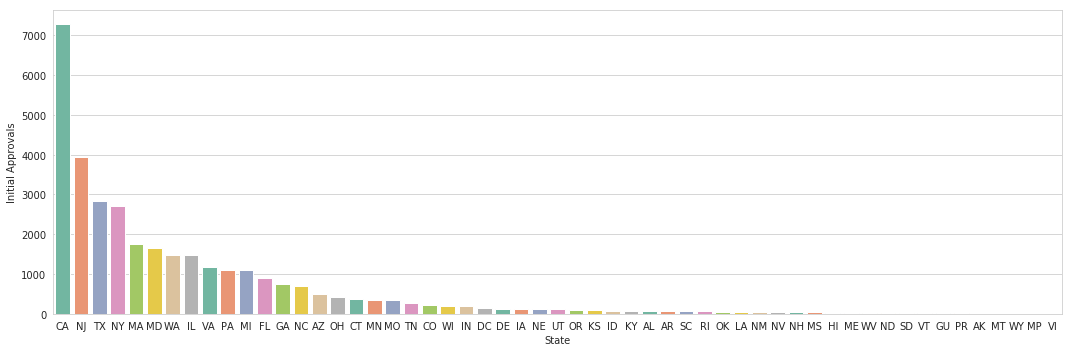

In [91]:
#plot the total_approval
fig, ax = plt.subplots(figsize=(15,5))

sns.barplot(x='State', y='Initial Approvals', data=final, palette='Set2')
plt.tight_layout()


In [28]:
df.columns

Index(['Fiscal Year', 'Employer', 'Initial Approvals', 'Initial Denials',
       'Continuing Approvals', 'Continuing Denials', 'NAICS', 'Tax ID',
       'State', 'City', 'ZIP', 'total_approval'],
      dtype='object')

/opt/conda/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



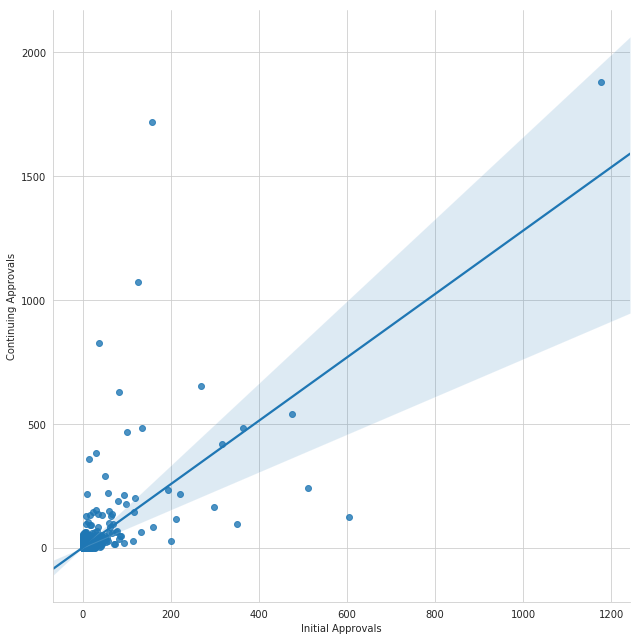

In [92]:
sns.lmplot(x='Initial Approvals', y='Continuing Approvals', data=df, size=9)
plt.tight_layout()

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



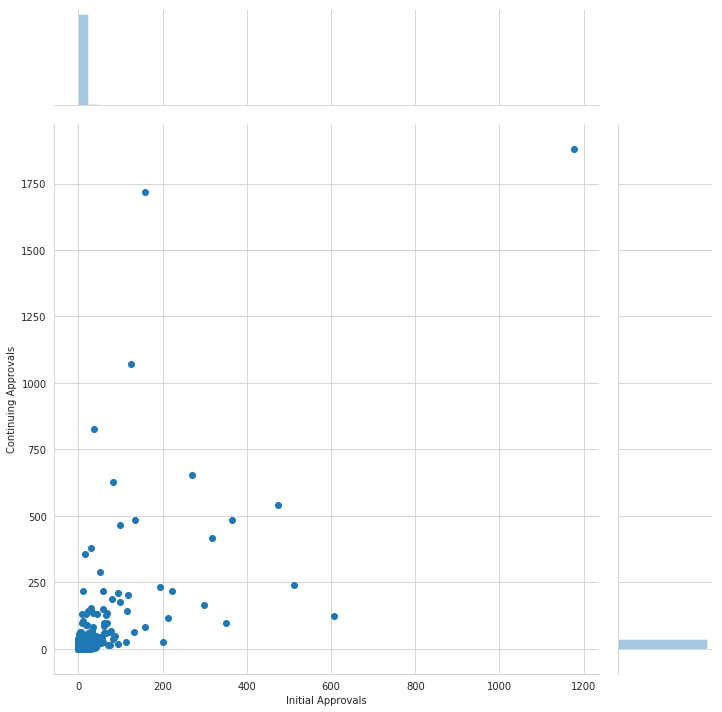

In [93]:
sns.jointplot(x='Initial Approvals', y='Continuing Approvals', data=df, size=10)

In [39]:
import cufflinks as cf
cf.go_offline

<function cufflinks.offline.go_offline(connected=None)>

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



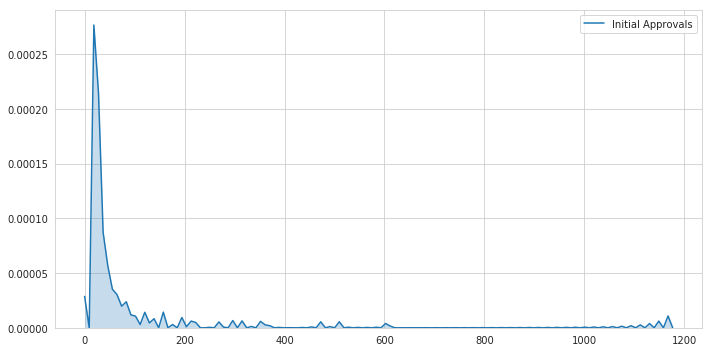

In [94]:
#check distribution of Initial Approvals
fig = plt.figure(figsize=(10,5))
sns.kdeplot(df['Initial Approvals'],shade=True)
plt.tight_layout()

In [51]:
df.columns

Index(['Fiscal Year', 'Employer', 'Initial Approvals', 'Initial Denials',
       'Continuing Approvals', 'Continuing Denials', 'NAICS', 'Tax ID',
       'State', 'City', 'ZIP', 'total_approval'],
      dtype='object')

In [96]:
#import, fit, predict and analyze model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [63]:
X = df[['Initial Denials', 'Continuing Approvals', 'Continuing Denials']]
y = df['Initial Approvals']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [73]:
model = LinearRegression()
model.fit(X_train, y_train)
pred=model.predict(X_test)

In [68]:
coef = model.coef_

In [72]:
cff = pd.DataFrame(coef, index=X.columns, columns=['Coefficent'])
cff

,Coefficent
Initial Denials,0.738705
Continuing Approvals,0.525576
Continuing Denials,-0.815963


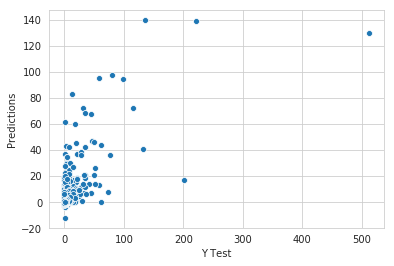

In [95]:
fig = sns.scatterplot(x=y_test, y=pred)
plt.tight_layout
plt.xlabel('Y Test')
plt.ylabel('Predictions')
plt.show(fig)

In [77]:
###Holding all other features fixed, a 1 unit increase in Initial Approvals is associated with an increase of 0.738705 total Initial Denials.
###Holding all other features fixed, a 1 unit increase in Initial Approvals is associated with an increase of 0.525576 total Continuing Approvals.
###Holding all other features fixed, a 1 unit increase in Initial Approvals is associated with an decrease of 0.815963 total Continuing Denials.

